In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [30]:

# Read the Excel file
excel_file = pd.ExcelFile('babylonia.xls')

# Get the names of the last 3 sheets
data_sheets = excel_file.sheet_names[-3:]

# Create a dictionary to store the dataframes
data = {}

# Read each of the last 3 sheets into separate dataframes
for sheet in data_sheets:
    data[sheet] = pd.read_excel(excel_file, sheet_name=sheet)

# Now 'data' is a dictionary containing the last 3 sheets as dataframes
# You can access each dataframe like this: data['sheet_name']

# Print the names of the imported sheets
print("Imported data sheets:", list(data.keys()))

# Optionally, you can display the first few rows of each dataframe
for sheet, df in data.items():
    print(f"\nFirst few rows of {sheet}:")
    print(df.head())

Imported data sheets: ['Blad1', 'Blad2', 'Blad3']

First few rows of Blad1:
   YEAR MON PART  JULIAN-fr   Day   Mon  Days to previous month  Year   \
0  -384  IX  NaN   2-12-385   2.0  12.0                   334.0  385.0   
1  -384  IX    b   2-12-385   2.0  12.0                   334.0  385.0   
2  -384  IX    m  12-12-385  12.0  12.0                   334.0  385.0   
3  -384  IX    e  22-12-385  22.0  12.0                   334.0  385.0   
4  -382  II  NaN   17-5-383  17.0   5.0                   120.0  383.0   

     Dec.year  JULIAN-to  ... Ses-interpretatie Ses-sk/1000 l.  \
0 -384.079452  31-12-385  ...               NaN            NaN   
1 -384.079452  11-12-385  ...               NaN            NaN   
2 -384.052055  21-12-385  ...               NaN            NaN   
3 -384.024658  31-12-385  ...               NaN            NaN   
4 -382.624658   15-6-383  ...               7.5     133.333333   

   Ses-silver (gr.)/1000 l.  WOOL 0.5 kg p. Shekel  Wo-interpretatie  \
0         

In [23]:
data['Blad1'].columns

Index(['YEAR', 'MON', 'PART', 'JULIAN-fr', 'Day', 'Mon',
       'Days to previous month', 'Year ', 'Dec.year', 'JULIAN-to', 'BARLEY',
       'Bar-interpretatie', 'Bar-sk/1000 l.', 'Bar-silver (gr.)/1000 l.',
       'Bar-silver (gr.)/1000 kg.', 'DATES', 'Dat-interpretatie',
       'Dates-sk/1000 l.', 'Dates-gr/1000 l.', 'Dates-gr/1000 kg', 'MUSTARD',
       'Mus-interpretatie', 'Mus-sk/1000 l.', 'Mus-silver (gr.)/1000 l.',
       'CRESS', 'Cre-interpretatie', 'Cre-sk/1000 l.',
       'Cre-silver (gr.)/1000 l.', 'SESAME', 'Ses-interpretatie',
       'Ses-sk/1000 l.', 'Ses-silver (gr.)/1000 l.', 'WOOL 0.5 kg p. Shekel',
       'Wo-interpretatie', 'sk/mina (=0,5 kg.)', 'Wo-silver (gr.)/0,5 kg.',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')

In [ ]:
pd.set_option('display.max_rows', 10)
data['Blad1']['Bar-interpretatie']

In [ ]:
# Extract the required columns
x = data['Blad1']['Dec.year']
y = data['Blad1']['Bar-sk/1000 l.']

# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(x, y, '-', linewidth=2)  # Line only
plt.xlabel('Decimal Year')
plt.ylabel('Barley (sk/1000 l)')
plt.title('Barley Price Over Time')

# Improve x-axis readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# # Print some basic statistics
# print(f"Correlation coefficient: {x.corr(y):.2f}")
# print(f"Mean barley price: {y.mean():.2f}")
# print(f"Median barley price: {y.median():.2f}")

In [ ]:
# Extract the required columns
x = data['Blad1']['Dec.year']
ybar = data['Blad1']['Bar-sk/1000 l.']
ydates = data['Blad1']['Dates-sk/1000 l.']

# Remove NaN values
mask = ~(x.isna() | ybar.isna() | ydates.isna())
x_clean = x[mask]
ybar_clean = ybar[mask]
ydates_clean = ydates[mask]

# Sort the data by x values to ensure proper line connection
sorted_indices = x_clean.argsort()
x_sorted = x_clean.iloc[sorted_indices]
x_sorted

In [ ]:

ybar_sorted = ybar_clean.iloc[sorted_indices]
ydates_sorted = ydates_clean.iloc[sorted_indices]
print(ybar_sorted.to_string())

In [ ]:

# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(x_sorted, ybar_sorted, '-', linewidth=2, label='Barley')  # Added label
plt.plot(x_sorted, ydates_sorted, '-', linewidth=2, label='Dates')  # Added label
plt.xlabel('Year (BCE)')
plt.ylabel('Price (Shekel)')
plt.title('Barley and Dates Prices Over Time')

# Improve x-axis readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

# Print some basic statistics
print(f"Correlation coefficient: {x_clean.corr(ybar_clean):.2f}")
print(f"Mean barley price: {ybar_clean.mean():.2f}")
print(f"Median barley price: {ybar_clean.median():.2f}")

In [ ]:
data['Blad1'].columns

In [ ]:
for i, row in data['Blad1'].iterrows():
    print(row['Dec.year'], row['Bar-interpretatie'], row['Bar-sk/1000 l.'])
# Create a scatter plot of all barley data points

In [ ]:
# Create a scatter plot of all barley data points
plt.figure(figsize=(12, 6))
plt.scatter(data['Blad1']['Dec.year'], data['Blad1']['Bar-sk/1000 l.'], alpha=0.5)
plt.legend()
# Update the y-axis label to reflect multiple metrics
plt.ylabel('Barley Price (Various Metrics)')
plt.xlabel('Year (BCE)')
plt.ylabel('Barley Price (Shekel/1000 liters)')
plt.title('Barley Prices Over Time')
# Improve x-axis readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
output_dir = 'Output'
os.makedirs(output_dir, exist_ok=True)

# Function to save plots
def save_plot(fig, filename):
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)  # Close the figure to free up memory
    print(f"Plot saved to {filepath}")

KeyError: 'sk/mina (=0,5 kg.)'

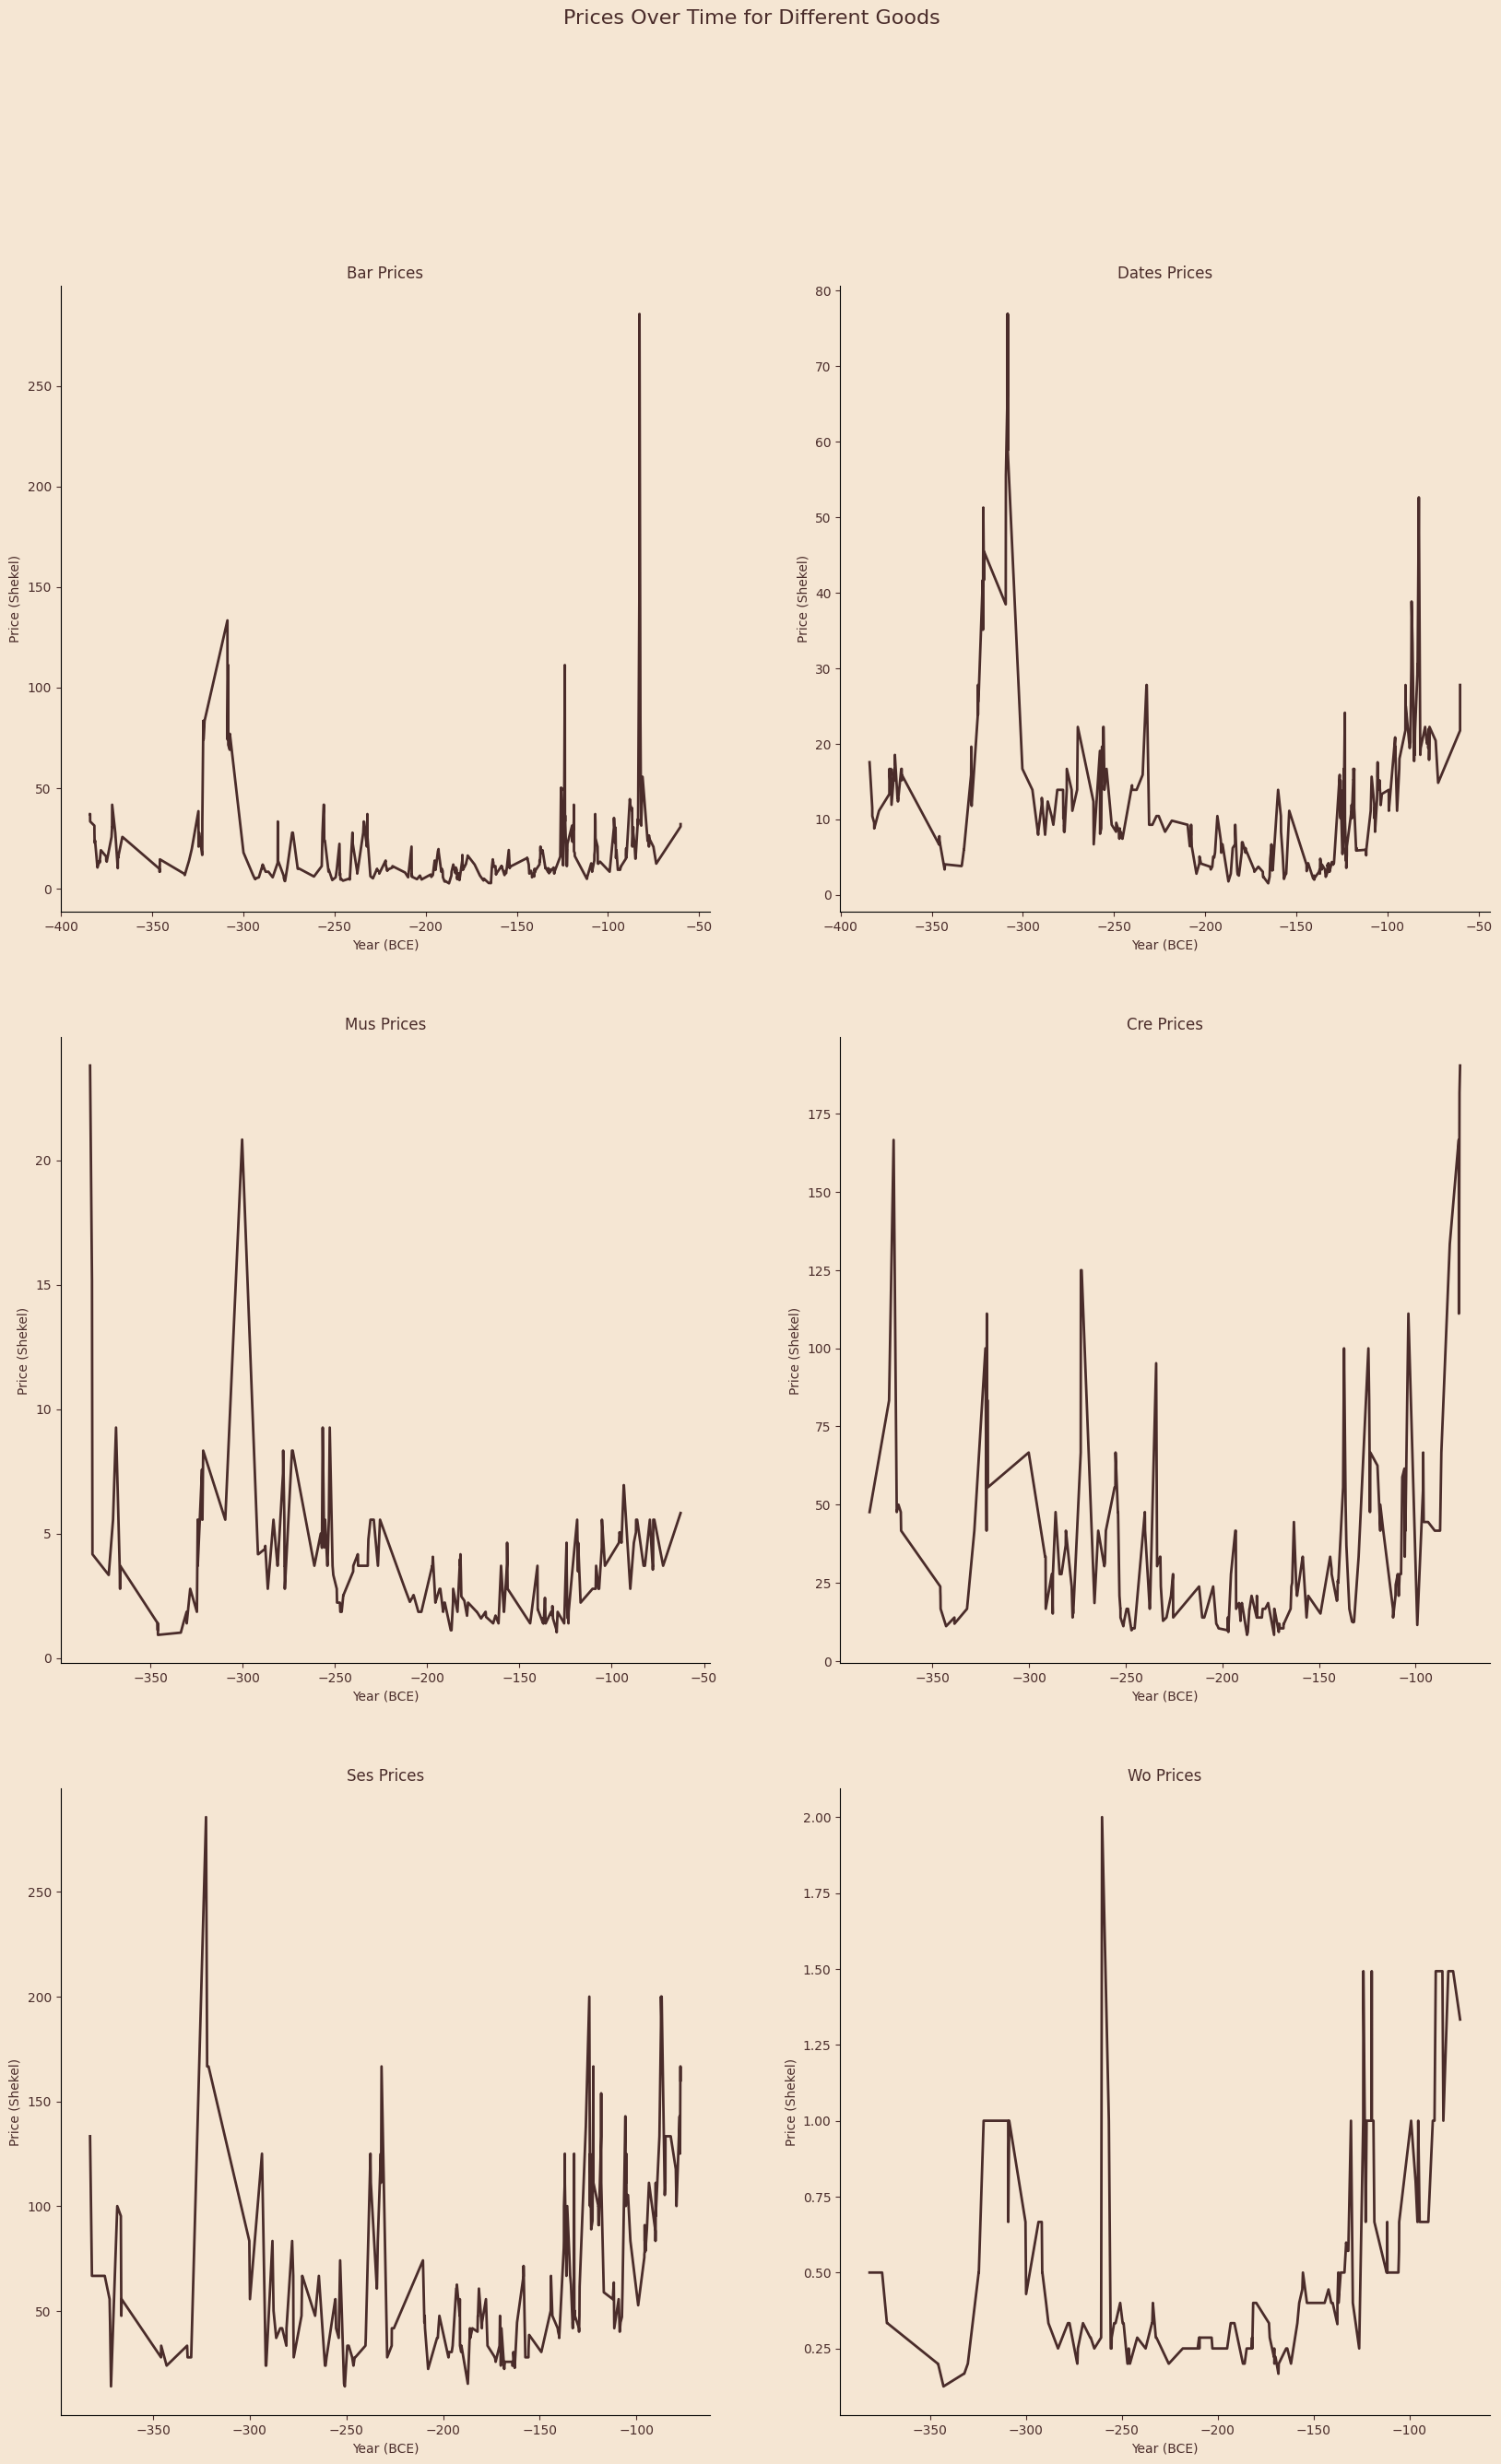

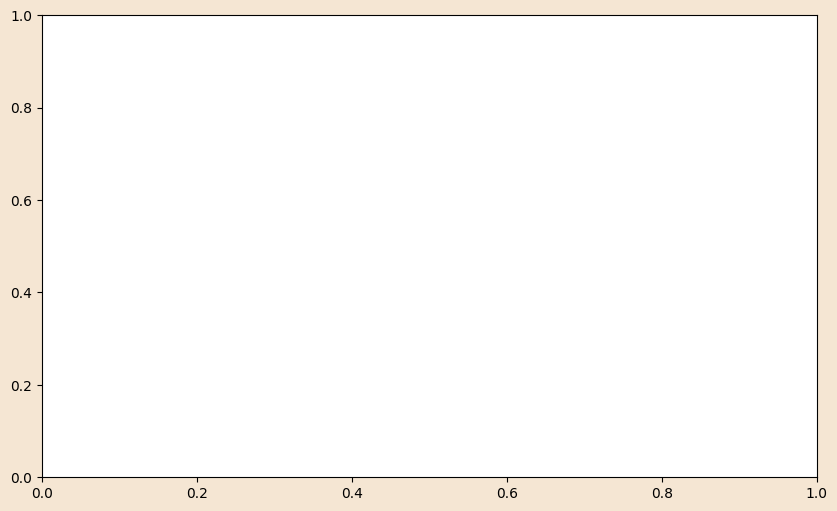

In [31]:
# Prepare data for all goods
goods = ['Bar', 'Dates', 'Mus', 'Cre', 'Ses', 'Wo']
goods_data = {}

for good in goods:
    if good == 'Wo':
        price_col = 'sk/mina (=0,5 kg.)'
    else:
        price_col = f'{good}-sk/1000 l.'
    
    goods_data[good] = data['Blad1'][['Dec.year', price_col]].dropna().sort_values('Dec.year')

# Create subplots for each good
fig, axs = plt.subplots(3, 2, figsize=(20, 30))
fig.suptitle('Prices Over Time for Different Goods', fontsize=16, color='#4A2C2A')
fig.patch.set_facecolor('#F5E6D3')  # Set beige background

for i, (good, data) in enumerate(goods_data.items()):
    row = i // 2
    col = i % 2
    
    price_col = 'sk/mina (=0,5 kg.)' if good == 'Wo' else f'{good}-sk/1000 l.'
    axs[row, col].plot(data['Dec.year'], data[price_col], linewidth=2, color='#4A2C2A')
    axs[row, col].set_xlabel('Year (BCE)', color='#4A2C2A')
    axs[row, col].set_ylabel('Price (Shekel)', color='#4A2C2A')
    axs[row, col].set_title(f'{good} Prices', color='#4A2C2A')
    axs[row, col].spines['top'].set_visible(False)
    axs[row, col].spines['right'].set_visible(False)
    axs[row, col].tick_params(colors='#4A2C2A')
    axs[row, col].set_facecolor('#F5E6D3')  # Set beige background for each subplot

# Save individual plots for each good
for i, (good, data) in enumerate(goods_data.items()):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('#F5E6D3')  # Set beige background
    ax.plot(data['Dec.year'], data[price_col], linewidth=2, color='#4A2C2A')
    ax.set_xlabel('Year (BCE)', color='#4A2C2A')
    ax.set_ylabel('Price', color='#4A2C2A')
    ax.set_title(f'{good} Prices', color='#4A2C2A')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(colors='#4A2C2A')
    ax.set_facecolor('#F5E6D3')  # Set beige background for the plot
    
    save_plot(fig, f'{good}_prices.png')

plt.tight_layout()
plt.show()


In [32]:
goods_data['Bar']

,Dec.year,Bar-sk/1000 l.
1,-384.079452,37.037037
2,-384.052055,37.040000
3,-384.024658,33.333333
8,-381.731507,31.250000
9,-381.704110,31.250000
...,...,...
1454,-77.410959,25.000000
1478,-75.068493,20.725389
1480,-73.531507,12.345679
1488,-60.175342,30.769231


In [ ]:
# Prepare the data for the line graph
barley_data = data['Blad1'][['Dec.year', 'Bar-sk/1000 l.']].dropna().sort_values('Dec.year')

# Calculate the differences between consecutive prices and time periods
barley_data['Time_Difference'] = barley_data['Dec.year'].diff()
barley_data['Price_Difference'] = barley_data['Bar-sk/1000 l.'].diff()
barley_data['Price_Change_Rate'] = barley_data['Price_Difference'] / barley_data['Time_Difference']

# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(barley_data['Dec.year'], barley_data['Price_Difference'], linewidth=2)
plt.xlabel('Year (BCE)')
plt.ylabel('Barley Price Difference (Shekel/1000 liters)')
plt.title('Barley Price Changes Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some statistics about the price differences
print(f"Mean price difference: {barley_data['Price_Difference'].mean():.2f}")
print(f"Median price difference: {barley_data['Price_Difference'].median():.2f}")
print(f"Standard deviation of price differences: {barley_data['Price_Difference'].std():.2f}")


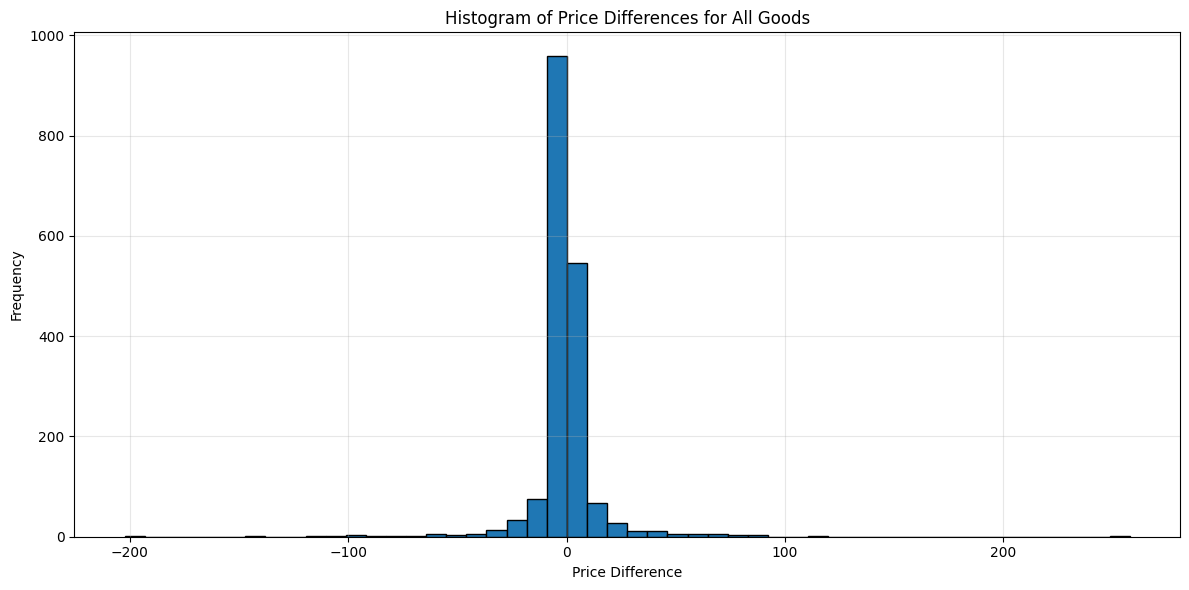

Number of price differences: 1800
Mean price difference: 0.09
Median price difference: 0.00
Standard deviation of price differences: 16.89


In [89]:
# Calculate price differences for all goods
price_differences = {}
for good, data in goods_data.items():
    price_col = 'sk/mina (=0,5 kg.)' if good == 'Wo' else f'{good}-sk/1000 l.'
    sorted_data = data.sort_values('Dec.year')
    price_differences[good] = sorted_data[price_col].diff().dropna()

# Combine all price differences
all_price_differences = pd.concat(price_differences.values())

# Create a histogram of price differences for all goods
plt.figure(figsize=(12, 6))
plt.hist(all_price_differences, bins=50, edgecolor='black')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Price Differences for All Goods')
plt.grid(True, alpha=0.3)

# Improve readability
plt.tight_layout()
plt.show()

# Print some statistics about the distribution
print(f"Number of price differences: {len(all_price_differences)}")
print(f"Mean price difference: {all_price_differences.mean():.2f}")
print(f"Median price difference: {all_price_differences.median():.2f}")
print(f"Standard deviation of price differences: {all_price_differences.std():.2f}")


<Figure size 1200x600 with 0 Axes>

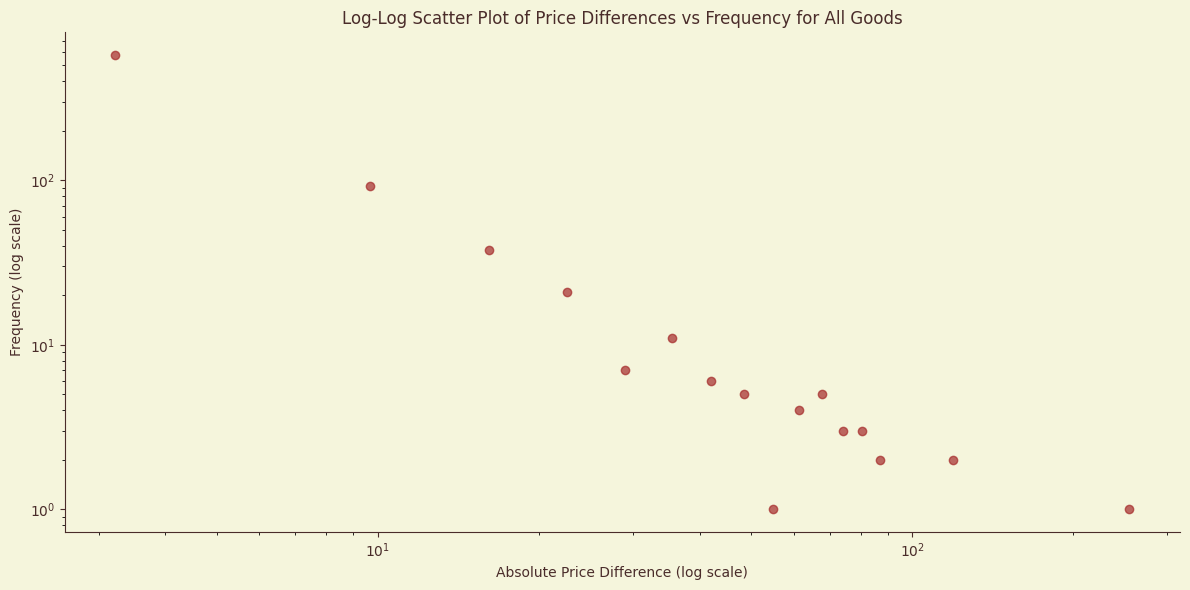

<Figure size 1200x600 with 0 Axes>

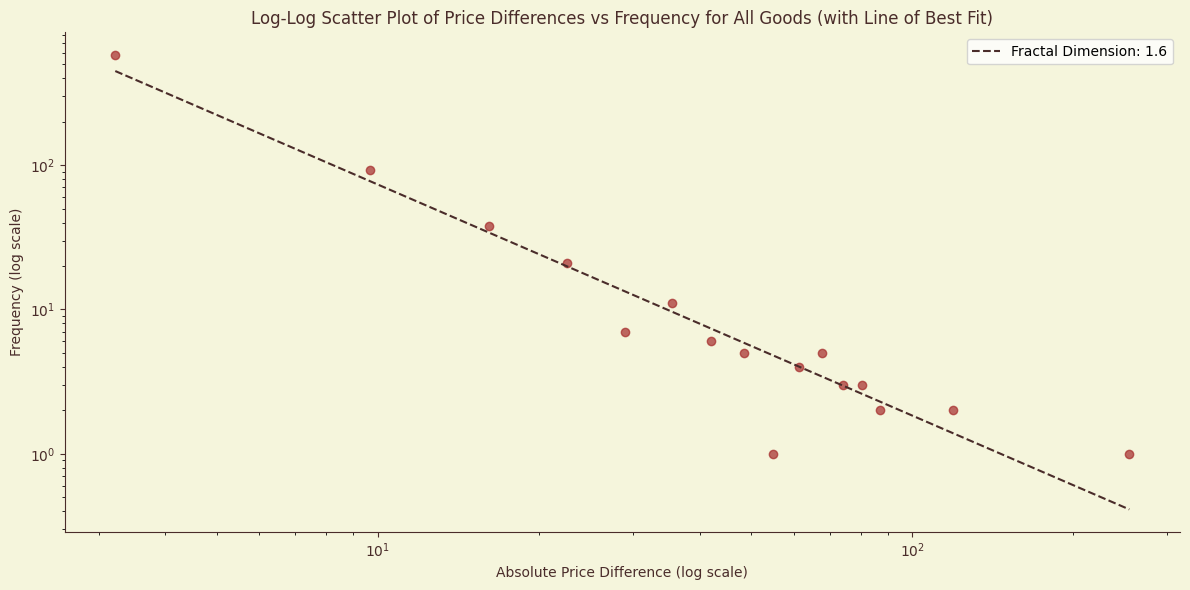

In [42]:
# Calculate price differences for all goods
price_differences = {}
for good, data in goods_data.items():
    price_col = 'sk/mina (=0,5 kg.)' if good == 'Wo' else f'{good}-sk/1000 l.'
    sorted_data = data.sort_values('Dec.year')
    price_differences[good] = sorted_data[price_col].diff().dropna()

# Combine all price differences
all_price_differences = pd.concat(price_differences.values())

# Function to create the log-log scatter plot
def create_log_log_plot(include_line_of_best_fit=False):
    # Create a log-log scatter plot of price differences and their frequencies
    plt.figure(figsize=(12, 6))

    # Calculate the frequency of each price difference using linear bins
    # Filter out zero and negative values
    non_zero_diffs = all_price_differences[all_price_differences > 0]

    # Define the number of bins
    num_bins = 40

    # Create linear bins
    min_val = non_zero_diffs.min()
    max_val = non_zero_diffs.max()
    bins = np.linspace(min_val, max_val, num=num_bins + 1)

    # Calculate histogram using the linear-spaced bins
    hist, bin_edges = np.histogram(non_zero_diffs, bins=bins)

    # Calculate bin centers
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Set the background color to beige
    plt.figure(figsize=(12, 6), facecolor='beige')
    ax = plt.gca()
    ax.set_facecolor('beige')

    # Plot the log-log scatter graph
    plt.scatter(bin_centers, hist, alpha=0.7, color='brown')
    plt.xscale('log')
    plt.yscale('log')

    if include_line_of_best_fit:
        # Calculate the line with slope -1.6
        # We'll use the first and last points to define our line
        x1, y1 = bin_centers[0], hist[0]
        x2, y2 = bin_centers[-1], hist[-1]

        # Calculate the y-intercept (b) using the point-slope form
        # y - y1 = m(x - x1), where m = -1.6
        # Increase the y-intercept by multiplying it by a larger factor
        b = (y1 + 1.6 * x1) * 5

        # Generate x values for the line
        x_line = np.logspace(np.log10(x1), np.log10(x2), num=100)

        # Calculate y values for the line
        y_line = 10 ** (np.log10(x_line) * (-1.6) + np.log10(b))

        # Plot the line with slope -1.6 in dark brown
        plt.plot(x_line, y_line, '--', color='#4A2C2A', label='Fractal Dimension: 1.6')

        # Add legend
        plt.legend()

    plt.xlabel('Absolute Price Difference (log scale)', color='#4A2C2A')
    plt.ylabel('Frequency (log scale)', color='#4A2C2A')
    title = 'Log-Log Scatter Plot of Price Differences vs Frequency for All Goods'
    if include_line_of_best_fit:
        title += ' (with Line of Best Fit)'
    plt.title(title, color='#4A2C2A')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set the color of the remaining spines to dark brown
    ax.spines['bottom'].set_color('#4A2C2A')
    ax.spines['left'].set_color('#4A2C2A')

    # Set the color of the tick labels to dark brown
    ax.tick_params(axis='x', colors='#4A2C2A')
    ax.tick_params(axis='y', colors='#4A2C2A')

    # Improve readability
    plt.tight_layout()
    
    # Save the plot in the output folder
    output_filename = 'log_log_plot_with_best_fit.png' if include_line_of_best_fit else 'log_log_plot_without_best_fit.png'
    plt.savefig(f'Output/{output_filename}')
    
    plt.show()

# Create and display the plot without the line of best fit
create_log_log_plot(include_line_of_best_fit=False)

# Create and display the plot with the line of best fit
create_log_log_plot(include_line_of_best_fit=True)

In [33]:
# Create a log-log scatter plot of price differences and their frequencies
plt.figure(figsize=(12, 6))

# Calculate the frequency of each price difference using linear bins
# Filter out zero and negative values
non_zero_diffs = all_price_differences[all_price_differences > 0]

# Define the number of bins
num_bins = 40

# Create linear bins
min_val = non_zero_diffs.min()
max_val = non_zero_diffs.max()
bins = np.linspace(min_val, max_val, num=num_bins + 1)

# Calculate histogram using the linear-spaced bins
hist, bin_edges = np.histogram(non_zero_diffs, bins=bins)

# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the log-log scatter graph
plt.scatter(bin_centers, hist, alpha=0.7)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Absolute Price Difference (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Log-Log Scatter Plot of Price Differences vs Frequency for All Goods')
plt.grid(True, which="both", ls="-", alpha=0.3)

# Improve readability
plt.tight_layout()
plt.show()

NameError: name 'all_price_differences' is not defined

<Figure size 1200x600 with 0 Axes>

In [100]:
for row in all_price_differences:
    print( row)
# Create a log-log plot of price differences and their frequencies

0.0029629629629610577
-3.7066666666666634
-2.0833333333333357
0.0
-3.4722222222222214
-5.050505050505052
1.0822510822510836
-13.392857142857144
0.0033333333333338544
3.4688888888888894
-1.0683760683760681
6.227106227106226
0.0023809523809532607
-3.1769841269841272
-0.0030158730158742486
-1.98111111111111
0.0
0.0011111111111112848
-0.5566666666666666
12.307692307692308
4.662004662004662
-0.003030303030303827
4.787719298245616
6.578947368421048
-13.888888888888886
-17.67676767676768
6.5656565656565675
0.0033333333333338544
-1.5184848484848494
10.48951048951049
0.0
-15.83710407239819
-0.0039215686274509665
-0.5407407407407412
-0.4873294346978554
-0.0019298245614045584
-0.43666666666666565
0.21367521367521292
-0.21367521367521292
6.159420289855072
-7.246376811594203
-0.30193236714975846
-0.2777777777777777
7.222222222222222
5.718954248366014
18.853695324283557
-10.683760683760681
-6.944444444444446
0.0
0.9057971014492772
0.9881422924901173
0.2612330198537087
-0.7662835249042139
0.766283524

/var/folders/_1/8j0kws797tg83z3r45c_770h0000gp/T/ipykernel_4543/3807277090.py:5: RuntimeWarning: divide by zero encountered in log10
  bins = np.logspace(np.log10(abs(all_price_differences).min()),
/Users/erichegonzales/Library/Python/3.11/lib/python/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/erichegonzales/Library/Python/3.11/lib/python/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


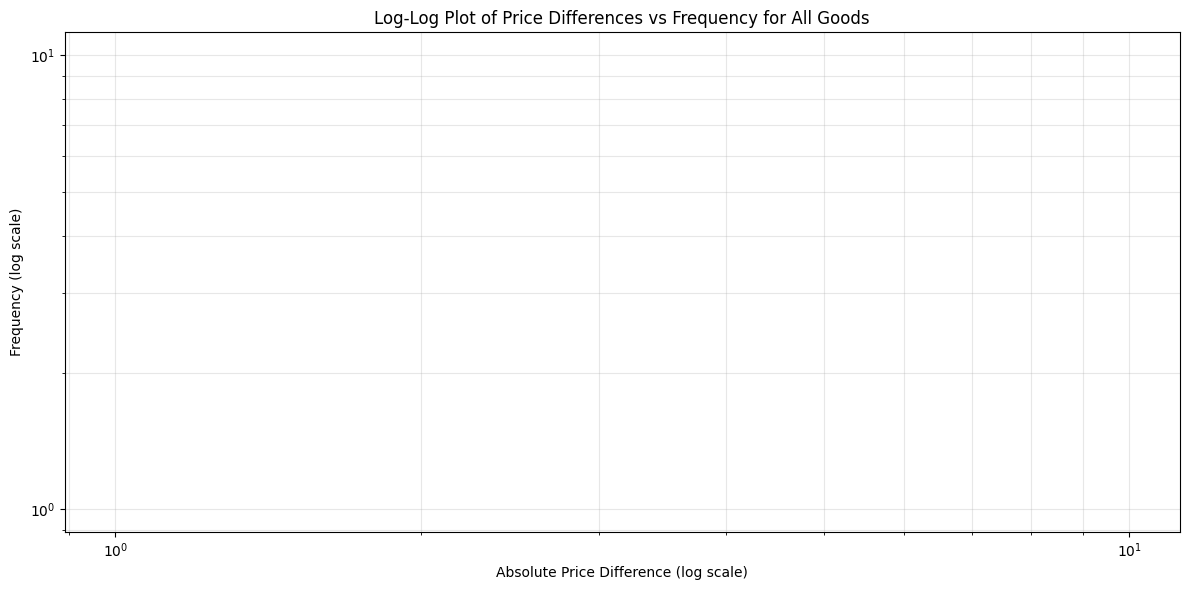

Mean of log absolute price difference: -inf
Median of log absolute price difference: 0.17
Standard deviation of log absolute price difference: nan


/Users/erichegonzales/Library/Python/3.11/lib/python/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/erichegonzales/Library/Python/3.11/lib/python/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [93]:
# Create a log-log plot of price differences and their frequencies
plt.figure(figsize=(12, 6))

# Calculate the frequency of each price difference and put them in bins
bins = np.logspace(np.log10(abs(all_price_differences).min()), 
                   np.log10(abs(all_price_differences).max()), 
                   num=50)
hist, bin_edges = np.histogram(abs(all_price_differences), bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the log-log graph
plt.loglog(bin_centers, hist, 'o-')

plt.xlabel('Absolute Price Difference (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Log-Log Plot of Price Differences vs Frequency for All Goods')
plt.grid(True, which="both", ls="-", alpha=0.3)

# Improve readability
plt.tight_layout()
plt.show()

# Print some statistics about the log-transformed data
log_abs_diff = np.log(all_price_differences.abs())
print(f"Mean of log absolute price difference: {log_abs_diff.mean():.2f}")
print(f"Median of log absolute price difference: {log_abs_diff.median():.2f}")
print(f"Standard deviation of log absolute price difference: {log_abs_diff.std():.2f}")
